# Mašinsko učenje
# Projekat 3 - Veštačke neuronske mreže
# Nikola Vukotić 1401, Željko Balanović 1533¶
## Prognoza vrste raka dojke
### Dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
import tensorflow.keras.backend as kb
from imblearn.over_sampling import SMOTE

In [177]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [178]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [179]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: >

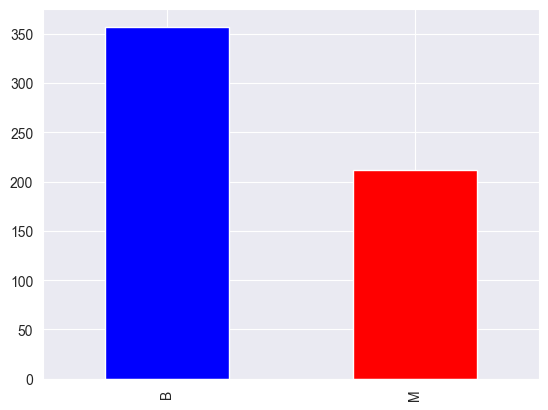

In [180]:
df.diagnosis.value_counts().plot(kind="bar", color=['blue', 'red'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [182]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [183]:
df = df.drop(columns=['id'])

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


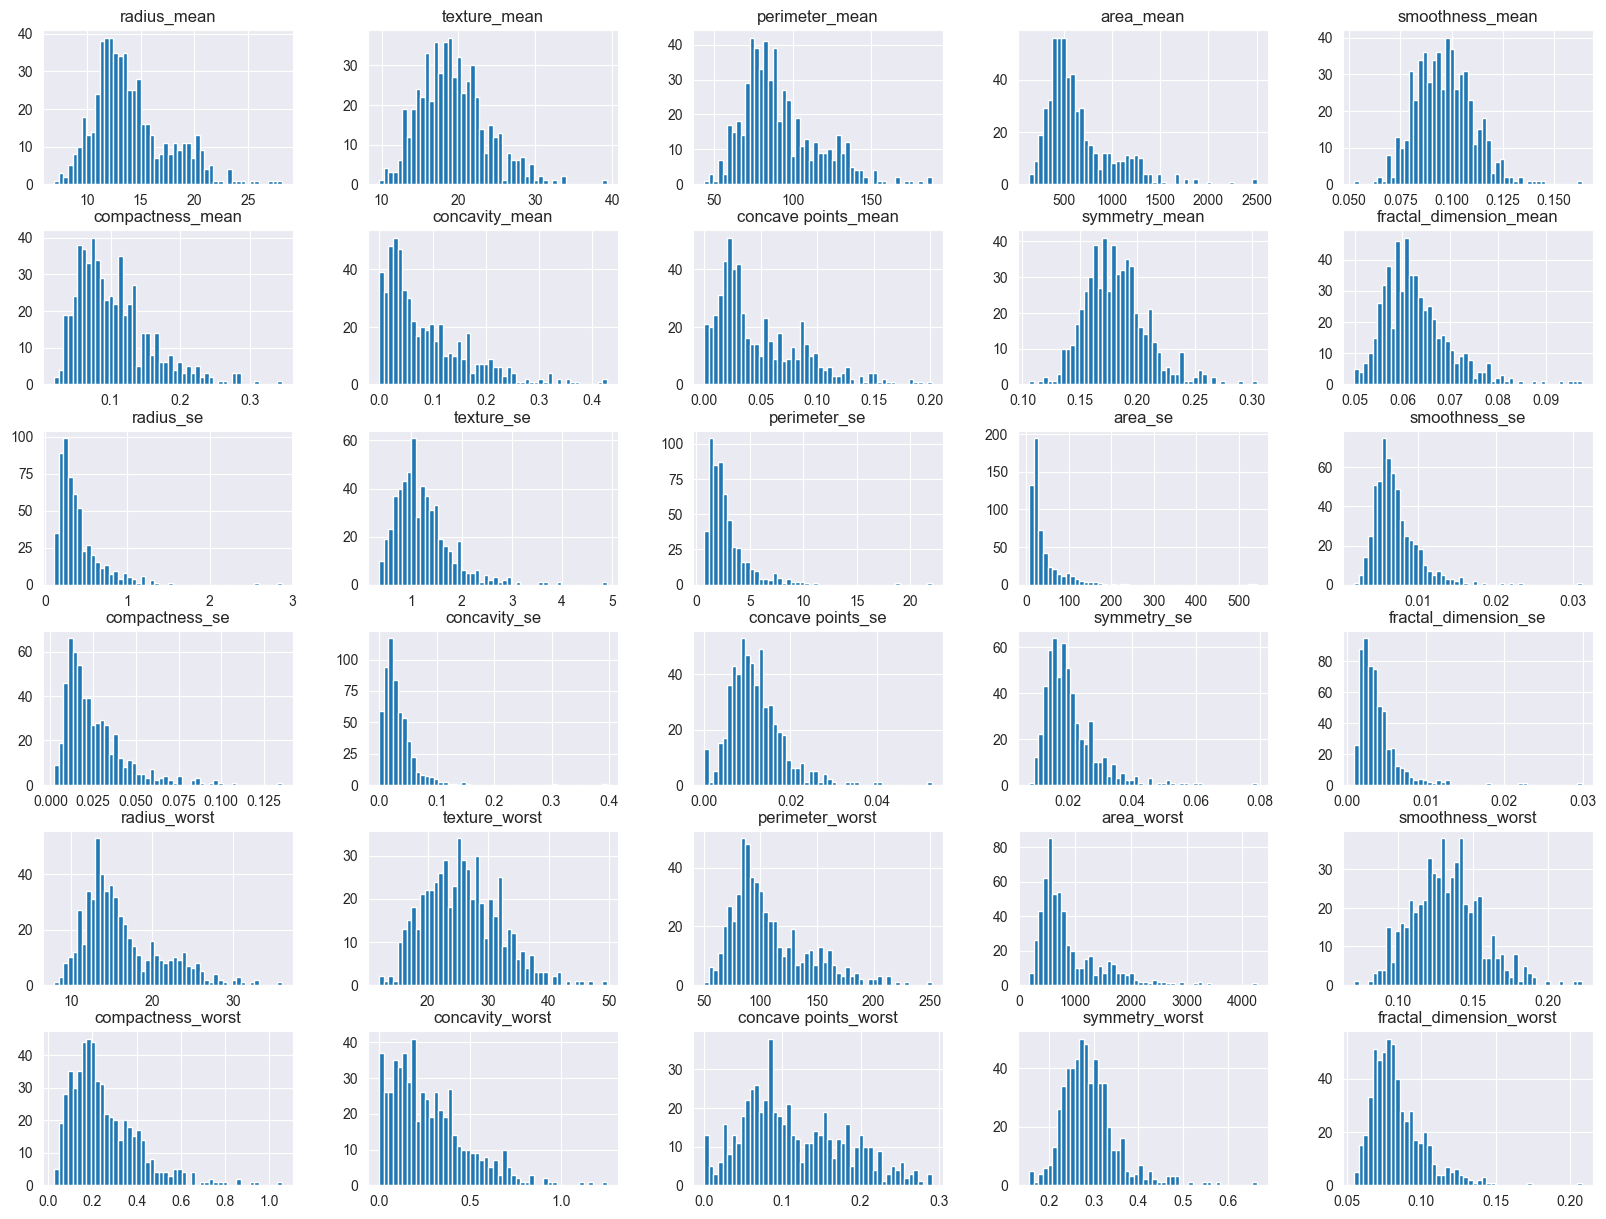

In [185]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

/var/folders/w9/1yzd3jfs0s18rk7_92qw2ctm0000gp/T/ipykernel_1948/2831401779.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


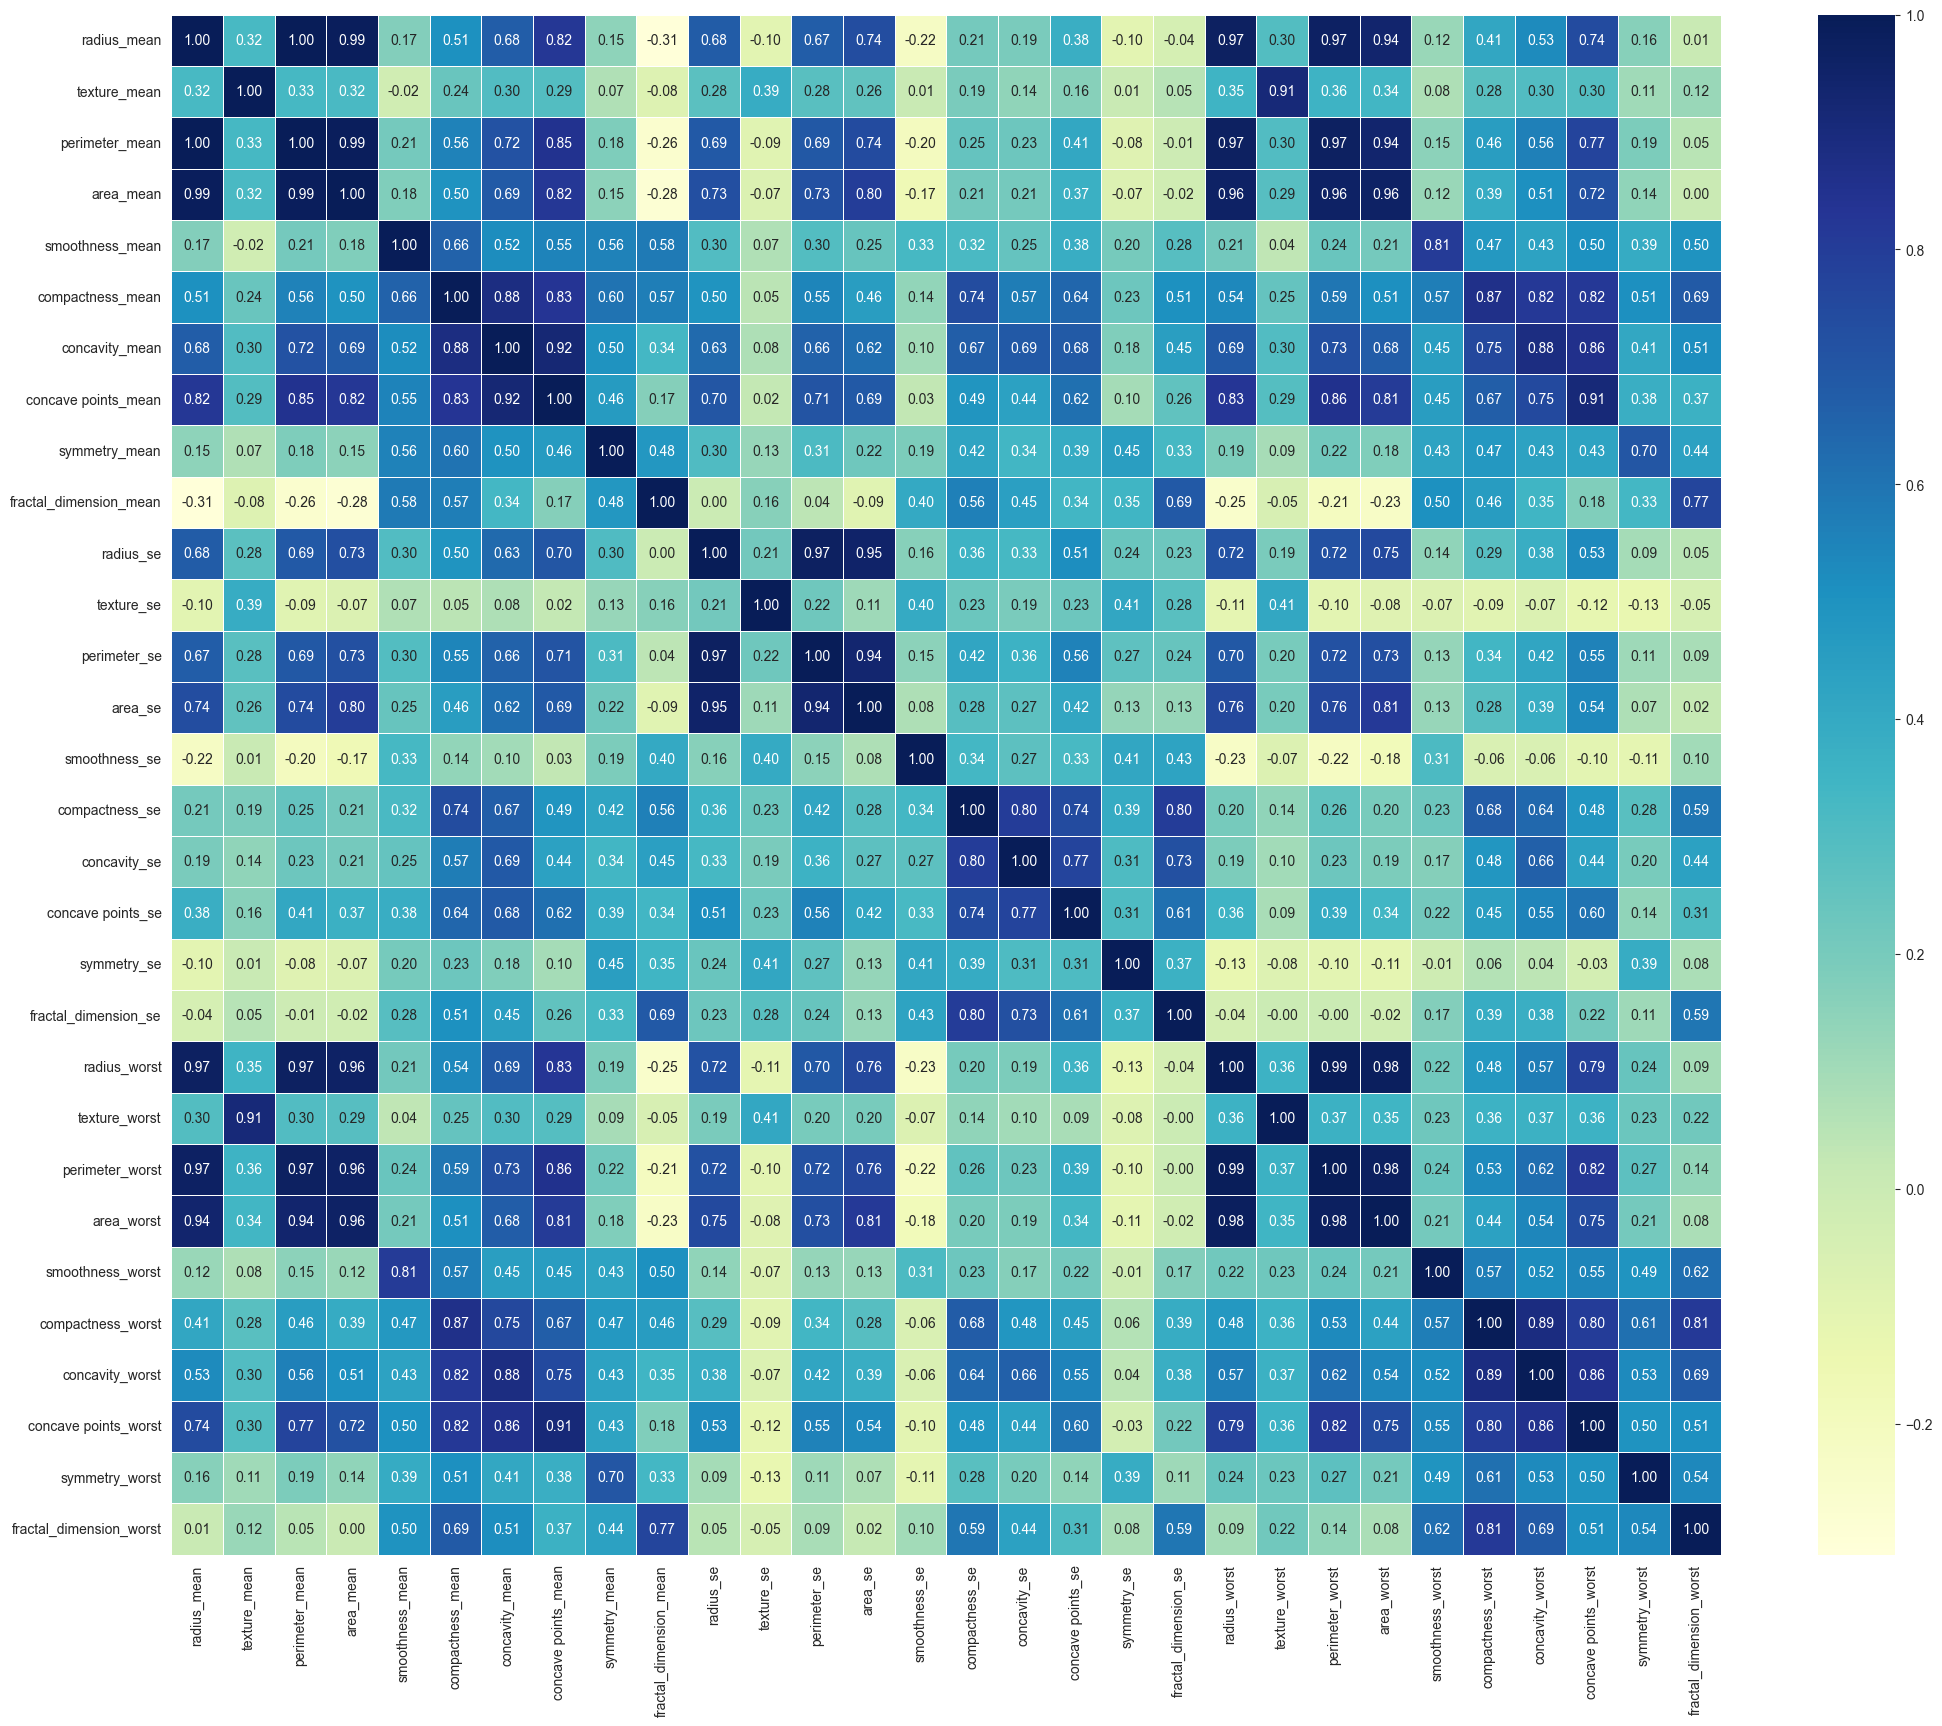

In [186]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap='YlGnBu')

In [187]:
df.drop(columns=['perimeter_worst', 'area_worst', 'area_mean', "perimeter_mean"], inplace=True)
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data preprocessing

In [188]:
X = df.drop(columns='diagnosis')
y = df.diagnosis

In [189]:
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [190]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [191]:
X = X.iloc[:,:].values
y = y.iloc[:].values

In [192]:
X

array([[17.99   , 10.38   ,  0.1184 , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.186  ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [193]:
y[:20]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [194]:
for i in range(len(y)):
  if (y[i] == 'M'):
    y[i] = 1
  else:
    y[i] = 0

In [195]:
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=object)

### Podela dataseta u trening i test

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
print('Num of train instances:', len(X_train))
print('Num of test instances:', len(X_test))

Num of train instances: 455
Num of test instances: 114


<Axes: xlabel='0'>

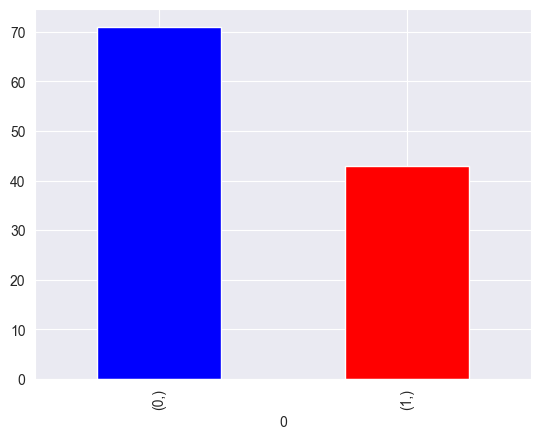

In [198]:
test_df = pd.DataFrame(y_test)
test_df.value_counts().plot(kind="bar", color=['blue', 'red'])

### Feature scaling

In [199]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [200]:
def get_pred_labels(ann, X_test):
  y_pred = ann.predict(X_test)
  for i in range(len(y_pred)):
    y_pred[i] = 1 if (y_pred[i] > 0.5) else 0
  y_pred = np.concatenate(y_pred, axis=0).astype(int)
  return y_pred


def show_conf_matrix(y_pred):
  cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
  plt.figure()
  plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.yticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.show()

### Rucno menjanje learning rate-a po clanku [1]
### Po clanku [1] su isprobani razliciti oprimiser-i


[1] Jason Brownlee PhD, https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

## 1. ANNS USING Adam optimiser

### ANN1

In [201]:
ann1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [202]:
ann1.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [203]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [204]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [205]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist = ann1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 635us/step - loss: 0.5312 - accuracy: 0.7604
Epoch 2/100
15/15 [==============================] - 0s 622us/step - loss: 0.3690 - accuracy: 0.8813
Epoch 3/100
15/15 [==============================] - 0s 576us/step - loss: 0.2760 - accuracy: 0.9187
Epoch 4/100
15/15 [==============================] - 0s 561us/step - loss: 0.2120 - accuracy: 0.9451
Epoch 5/100
15/15 [==============================] - 0s 673us/step - loss: 0.1687 - accuracy: 0.9495
Epoch 6/100
15/15 [==============================] - 0s 596us/step - loss: 0.1407 - accuracy: 0.9560
Epoch 7/100
15/15 [==============================] - 0s 576us/step - loss: 0.1190 - accuracy: 0.9626
Epoch 8/100
15/15 [==============================] - 0s 602us/step - loss: 0.1048 - accuracy: 0.9692
Epoch 9/100
15/15 [==============================] - 0s 508us/step - loss: 0.0931 - accuracy: 0.9736
Epoch 10/100
15/15 [==============================] - 0s 492us/step - loss: 0.0840 - accura

### Evaluating ANN1

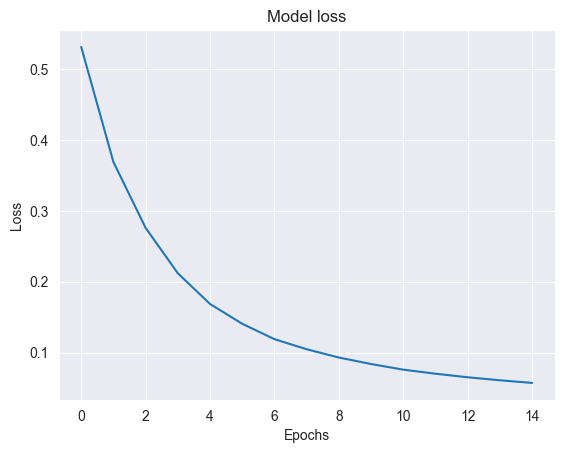

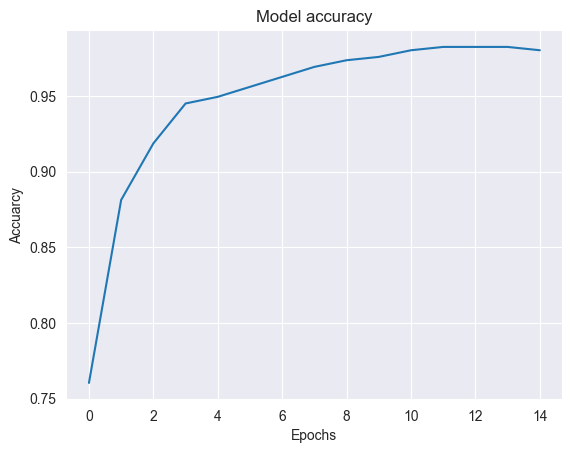

In [206]:
plt.plot(ann1_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [207]:
y_pred = get_pred_labels(ann1, X_test)

4/4 [==============================] - 0s 869us/step


In [208]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

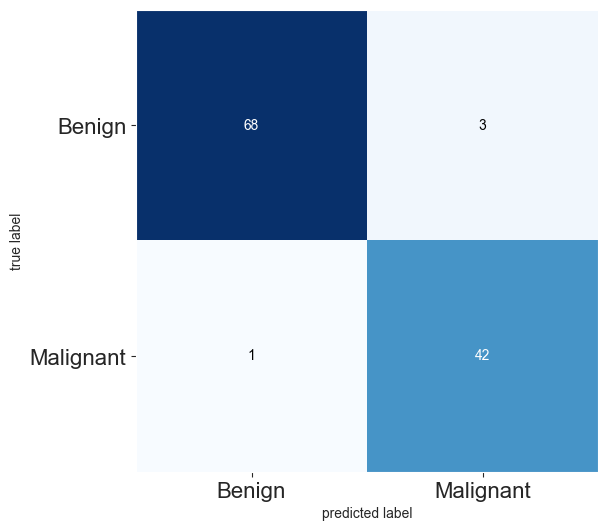

In [209]:
show_conf_matrix(y_pred)

In [210]:
acc1 = accuracy_score(y_test.astype(int), y_pred.astype(int))
acc1

0.9649122807017544

In [211]:
recall1 = recall_score(y_test.astype(int), y_pred.astype(int))
recall1

0.9767441860465116

In [212]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## ANN2 

In [213]:
ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [214]:
ann2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [215]:
ann2_hist = ann2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 604us/step - loss: 0.4617 - accuracy: 0.8132
Epoch 2/100
15/15 [==============================] - 0s 603us/step - loss: 0.3505 - accuracy: 0.8615
Epoch 3/100
15/15 [==============================] - 0s 483us/step - loss: 0.2806 - accuracy: 0.8923
Epoch 4/100
15/15 [==============================] - 0s 533us/step - loss: 0.2198 - accuracy: 0.9341
Epoch 5/100
15/15 [==============================] - 0s 517us/step - loss: 0.1975 - accuracy: 0.9275
Epoch 6/100
15/15 [==============================] - 0s 540us/step - loss: 0.1692 - accuracy: 0.9516
Epoch 7/100
15/15 [==============================] - 0s 471us/step - loss: 0.1617 - accuracy: 0.9538
Epoch 8/100
15/15 [==============================] - 0s 465us/step - loss: 0.1431 - accuracy: 0.9516
Epoch 9/100
15/15 [==============================] - 0s 466us/step - loss: 0.1251 - accuracy: 0.9648
Epoch 10/100
15/15 [==============================] - 0s 533us/step - loss: 0.1162 - accura

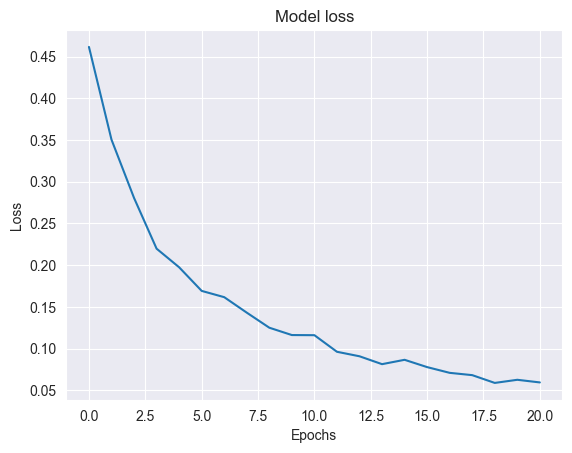

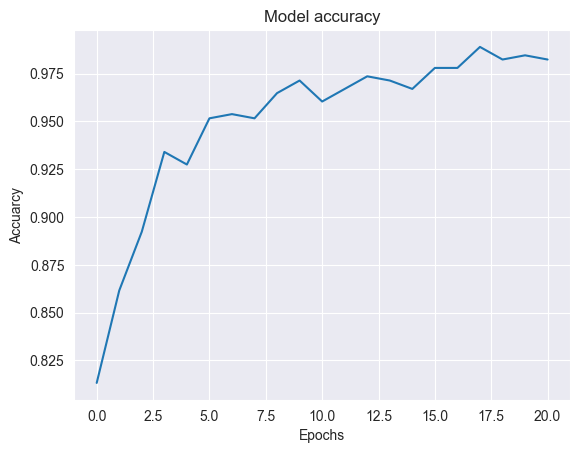

In [216]:
plt.plot(ann2_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [217]:
y_pred2 = get_pred_labels(ann2, X_test)

4/4 [==============================] - 0s 841us/step


<Figure size 640x480 with 0 Axes>

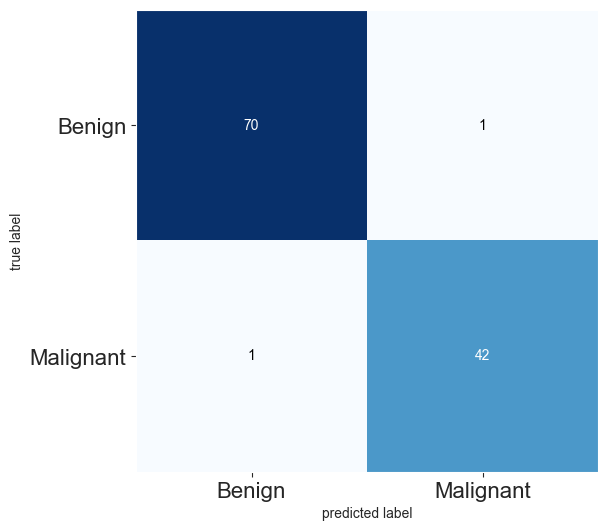

In [218]:
show_conf_matrix(y_pred2)

In [219]:
acc2 = accuracy_score(y_test.astype(int), y_pred2.astype(int))
acc2

0.9824561403508771

In [220]:
recall2 = recall_score(y_test.astype(int), y_pred2.astype(int))
recall2

0.9767441860465116

In [221]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## ANN3

In [222]:
ann3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [223]:
ann3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [224]:
ann3_hist = ann3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.8176
Epoch 2/100
15/15 [==============================] - 0s 679us/step - loss: 0.3232 - accuracy: 0.9121
Epoch 3/100
15/15 [==============================] - 0s 676us/step - loss: 0.2049 - accuracy: 0.9297
Epoch 4/100
15/15 [==============================] - 0s 632us/step - loss: 0.1333 - accuracy: 0.9560
Epoch 5/100
15/15 [==============================] - 0s 626us/step - loss: 0.0999 - accuracy: 0.9714
Epoch 6/100
15/15 [==============================] - 0s 581us/step - loss: 0.0773 - accuracy: 0.9758
Epoch 7/100
15/15 [==============================] - 0s 541us/step - loss: 0.0635 - accuracy: 0.9802
Epoch 8/100
15/15 [==============================] - 0s 535us/step - loss: 0.0527 - accuracy: 0.9846
Epoch 9/100
15/15 [==============================] - 0s 546us/step - loss: 0.0443 - accuracy: 0.9868
Epoch 10/100
15/15 [==============================] - 0s 609us/step - loss: 0.0362 - accuracy

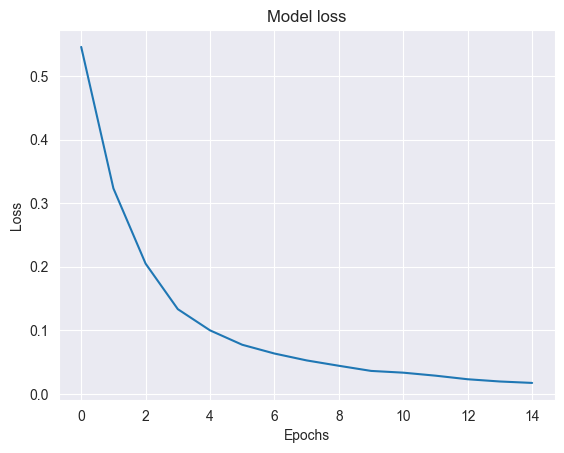

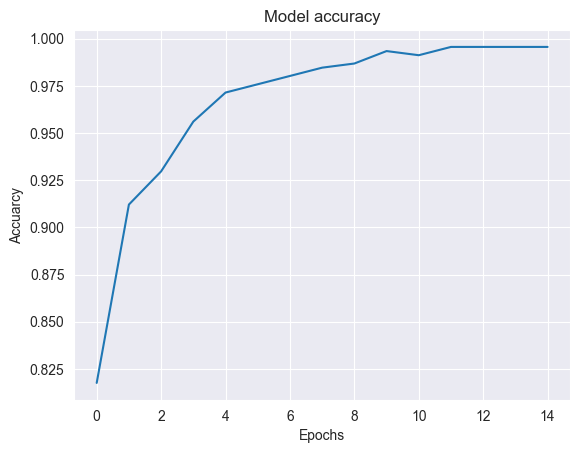

In [225]:
plt.plot(ann3_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [226]:
y_pred3 = get_pred_labels(ann3, X_test)

4/4 [==============================] - 0s 953us/step


<Figure size 640x480 with 0 Axes>

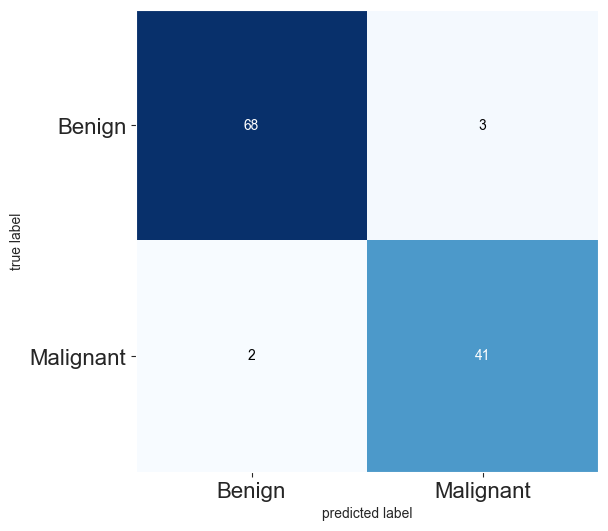

In [227]:
show_conf_matrix(y_pred3)

In [228]:
acc3 = accuracy_score(y_test.astype(int), y_pred3.astype(int))
acc3

0.956140350877193

In [229]:
recall3 = recall_score(y_test.astype(int), y_pred3.astype(int))
recall3

0.9534883720930233

In [230]:
print(classification_report(y_test.astype(int), y_pred3.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

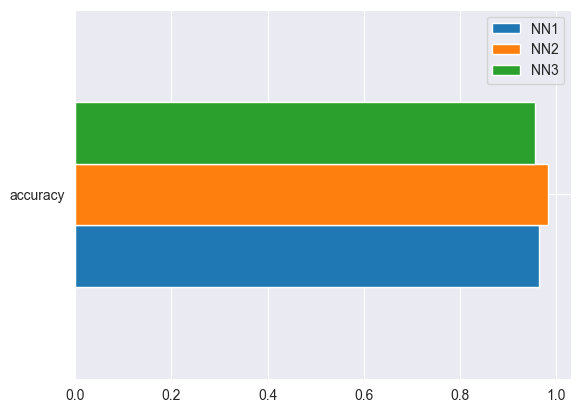

In [231]:
model_scores = {
    'NN1': acc1,
    'NN2': acc2,
    'NN3': acc3
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',)

<Axes: >

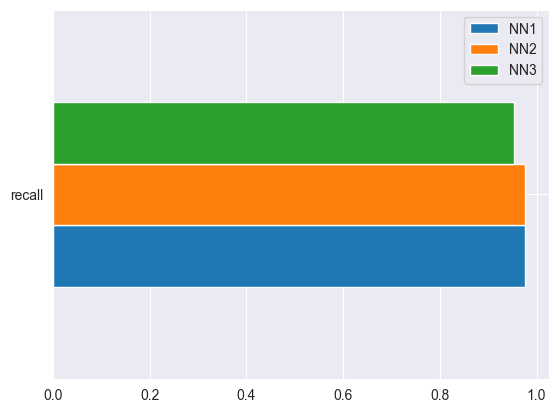

In [232]:
model_recall_scores_ = {
    'NN1': recall1,
    'NN2': recall2,
    'NN3': recall3
}
model_compare_recall = pd.DataFrame(model_recall_scores_, index=["recall"])
model_compare_recall.plot(kind='barh',)

## 2. ANNS Using "Adagrad" Optimiser

## ANN1 Adagrad

In [233]:
ann1_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [234]:
ann1_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [235]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)


In [236]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_adagrad = ann1_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 588us/step - loss: 0.9082 - accuracy: 0.2220
Epoch 2/100
15/15 [==============================] - 0s 521us/step - loss: 0.8818 - accuracy: 0.2352
Epoch 3/100
15/15 [==============================] - 0s 514us/step - loss: 0.8610 - accuracy: 0.2462
Epoch 4/100
15/15 [==============================] - 0s 456us/step - loss: 0.8431 - accuracy: 0.2527
Epoch 5/100
15/15 [==============================] - 0s 496us/step - loss: 0.8271 - accuracy: 0.2637
Epoch 6/100
15/15 [==============================] - 0s 521us/step - loss: 0.8130 - accuracy: 0.2791
Epoch 7/100
15/15 [==============================] - 0s 500us/step - loss: 0.7999 - accuracy: 0.2923
Epoch 8/100
15/15 [==============================] - 0s 449us/step - loss: 0.7874 - accuracy: 0.3055
Epoch 9/100
15/15 [==============================] - 0s 487us/step - loss: 0.7759 - accuracy: 0.3187
Epoch 10/100
15/15 [==============================] - 0s 454us/step - loss: 0.7650 - accura

In [237]:
### Evaluating

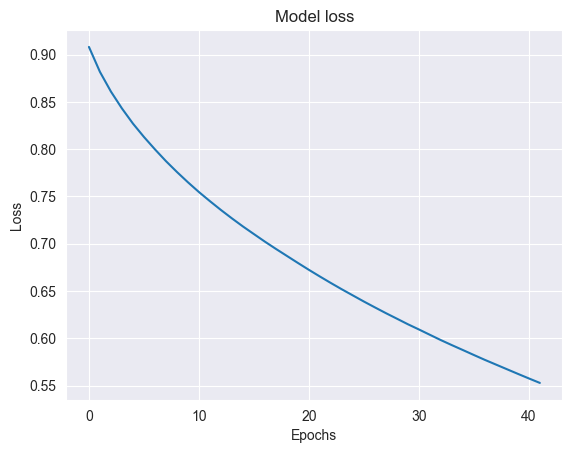

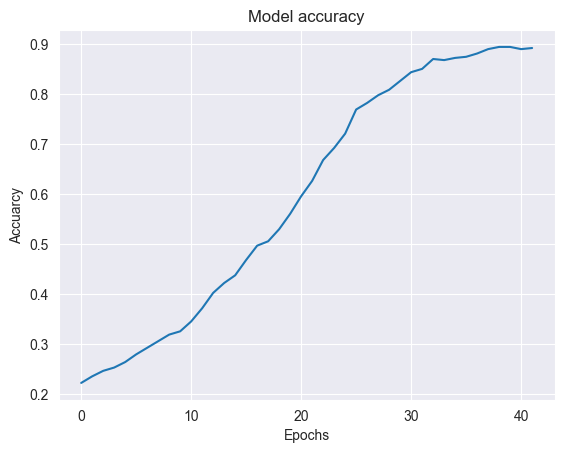

In [238]:
plt.plot(ann1_hist_adagrad.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_adagrad.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [239]:
y_pred_adagrad = get_pred_labels(ann1_adagrad, X_test)

4/4 [==============================] - 0s 852us/step


In [240]:
y_pred_adagrad

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1])

<Figure size 640x480 with 0 Axes>

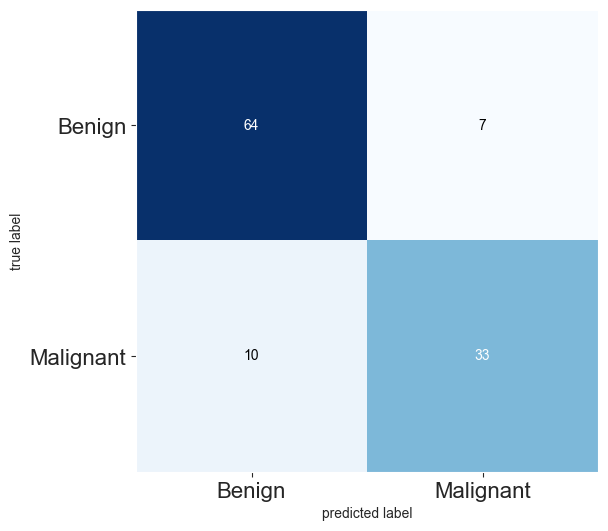

In [241]:
show_conf_matrix(y_pred_adagrad)


In [242]:
acc1_adagrad = accuracy_score(y_test.astype(int), y_pred_adagrad.astype(int))
acc1_adagrad

0.8508771929824561

In [243]:
recall_adagrad = recall_score(y_test.astype(int), y_pred_adagrad.astype(int))
recall_adagrad

0.7674418604651163

In [244]:
print(classification_report(y_test.astype(int), y_pred_adagrad.astype(int)))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        71
           1       0.82      0.77      0.80        43

    accuracy                           0.85       114
   macro avg       0.84      0.83      0.84       114
weighted avg       0.85      0.85      0.85       114



## ANN2 Adagrad

In [245]:
ann2_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [246]:
ann2_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [247]:
ann2_adagrad_hist = ann2_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 614us/step - loss: 0.8115 - accuracy: 0.3604
Epoch 2/100
15/15 [==============================] - 0s 532us/step - loss: 0.7862 - accuracy: 0.3692
Epoch 3/100
15/15 [==============================] - 0s 501us/step - loss: 0.7592 - accuracy: 0.4132
Epoch 4/100
15/15 [==============================] - 0s 486us/step - loss: 0.7456 - accuracy: 0.4132
Epoch 5/100
15/15 [==============================] - 0s 523us/step - loss: 0.7249 - accuracy: 0.4615
Epoch 6/100
15/15 [==============================] - 0s 515us/step - loss: 0.7115 - accuracy: 0.4791
Epoch 7/100
15/15 [==============================] - 0s 551us/step - loss: 0.7025 - accuracy: 0.5121
Epoch 8/100
15/15 [==============================] - 0s 450us/step - loss: 0.7016 - accuracy: 0.5077
Epoch 9/100
15/15 [==============================] - 0s 489us/step - loss: 0.6779 - accuracy: 0.5297
Epoch 10/100
15/15 [==============================] - 0s 535us/step - loss: 0.6592 - accura

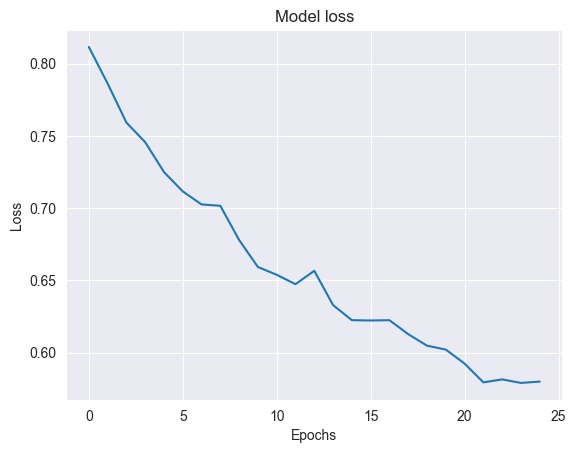

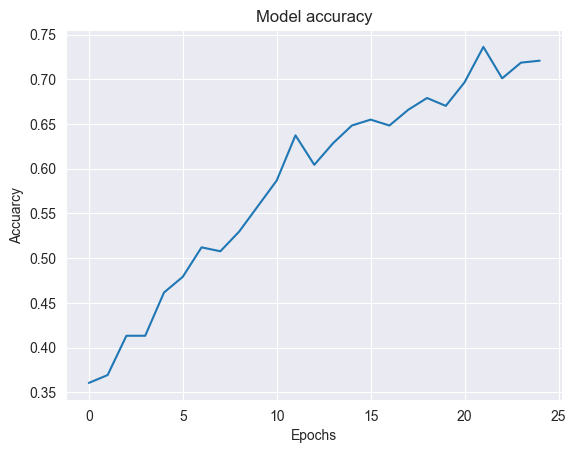

In [248]:
plt.plot(ann2_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [249]:
y_pred2_adagrad = get_pred_labels(ann2_adagrad, X_test)

4/4 [==============================] - 0s 832us/step


<Figure size 640x480 with 0 Axes>

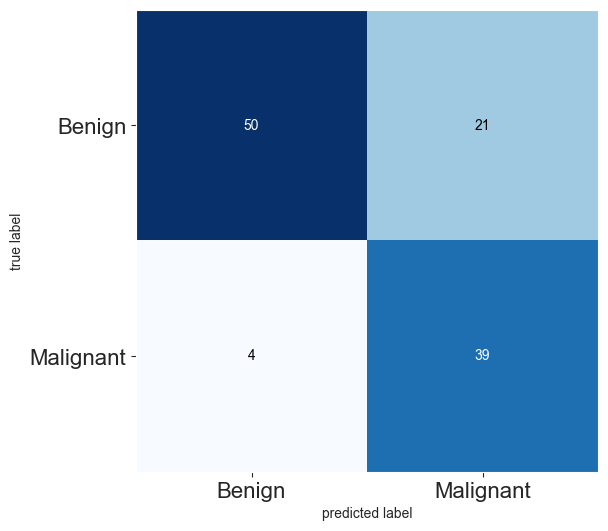

In [250]:
show_conf_matrix(y_pred2_adagrad)

In [251]:
acc2_adagrad = accuracy_score(y_test.astype(int), y_pred2_adagrad.astype(int))
acc2_adagrad

0.7807017543859649

In [252]:
recall2_adagrad = recall_score(y_test.astype(int), y_pred2_adagrad.astype(int))
recall2_adagrad

0.9069767441860465

In [253]:
print(classification_report(y_test.astype(int), y_pred2_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        71
           1       0.65      0.91      0.76        43

    accuracy                           0.78       114
   macro avg       0.79      0.81      0.78       114
weighted avg       0.82      0.78      0.78       114



## ANN3 Adagrad

In [254]:
ann3_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [255]:
ann3_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [256]:
ann3_adagrad_hist = ann3_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 650us/step - loss: 0.6761 - accuracy: 0.6198
Epoch 2/100
15/15 [==============================] - 0s 641us/step - loss: 0.6674 - accuracy: 0.6659
Epoch 3/100
15/15 [==============================] - 0s 622us/step - loss: 0.6588 - accuracy: 0.6923
Epoch 4/100
15/15 [==============================] - 0s 562us/step - loss: 0.6504 - accuracy: 0.7209
Epoch 5/100
15/15 [==============================] - 0s 625us/step - loss: 0.6415 - accuracy: 0.7670
Epoch 6/100
15/15 [==============================] - 0s 578us/step - loss: 0.6328 - accuracy: 0.7890
Epoch 7/100
15/15 [==============================] - 0s 483us/step - loss: 0.6235 - accuracy: 0.7956
Epoch 8/100
15/15 [==============================] - 0s 473us/step - loss: 0.6146 - accuracy: 0.8000
Epoch 9/100
15/15 [==============================] - 0s 503us/step - loss: 0.6057 - accuracy: 0.8044
Epoch 10/100
15/15 [==============================] - 0s 594us/step - loss: 0.5966 - accura

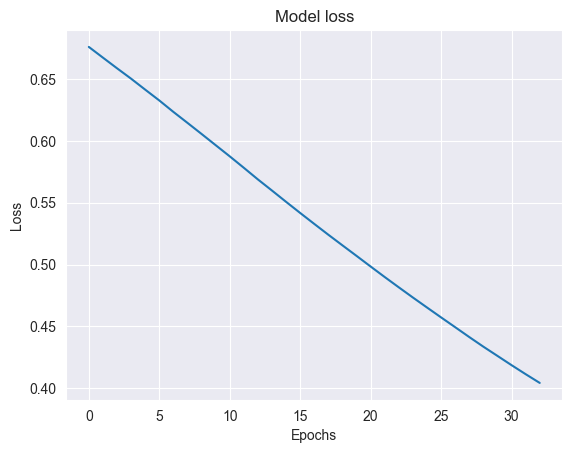

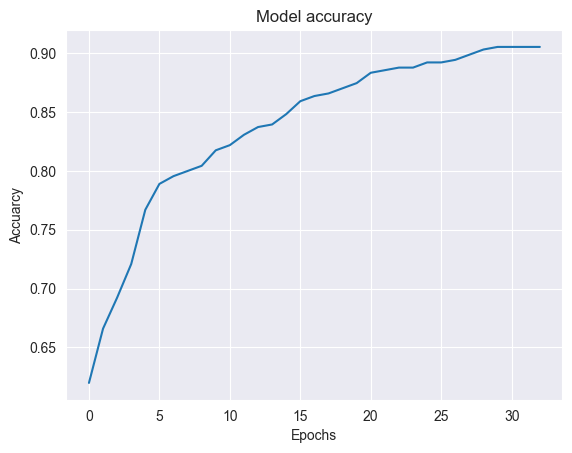

In [257]:
plt.plot(ann3_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [258]:
y_pred3_adagrad = get_pred_labels(ann3_adagrad, X_test)

4/4 [==============================] - 0s 896us/step


<Figure size 640x480 with 0 Axes>

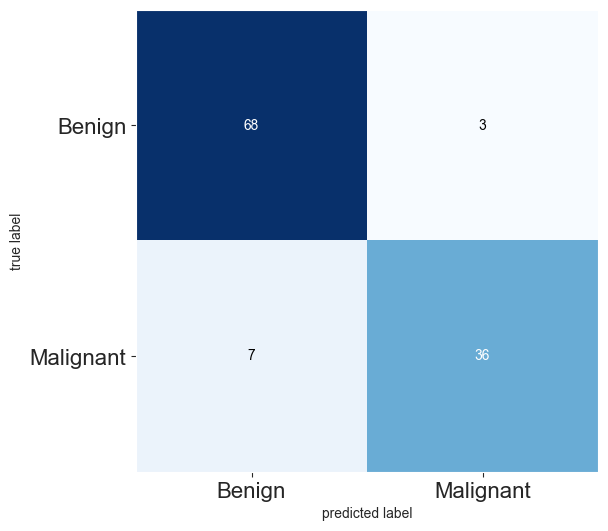

In [259]:
show_conf_matrix(y_pred3_adagrad)

In [260]:
acc3_adagrad = accuracy_score(y_test.astype(int), y_pred3_adagrad.astype(int))
acc3_adagrad

0.9122807017543859

In [261]:
recall3_adagrad = recall_score(y_test.astype(int), y_pred3_adagrad.astype(int))
recall3_adagrad

0.8372093023255814

In [262]:
print(classification_report(y_test.astype(int), y_pred3_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



<Axes: >

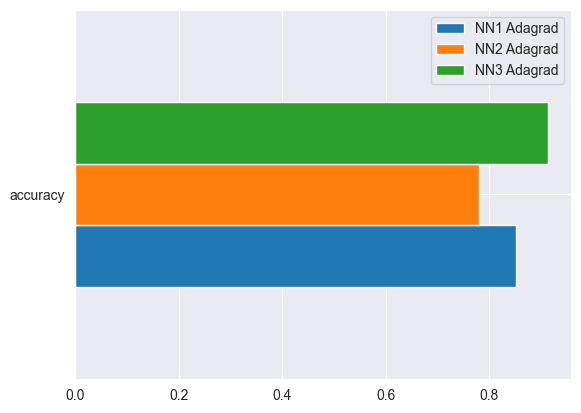

In [351]:
model_scores = {
    'NN1 Adagrad': acc1_adagrad,
    'NN2 Adagrad': acc2_adagrad,
    'NN3 Adagrad': acc3_adagrad
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',)

<Axes: >

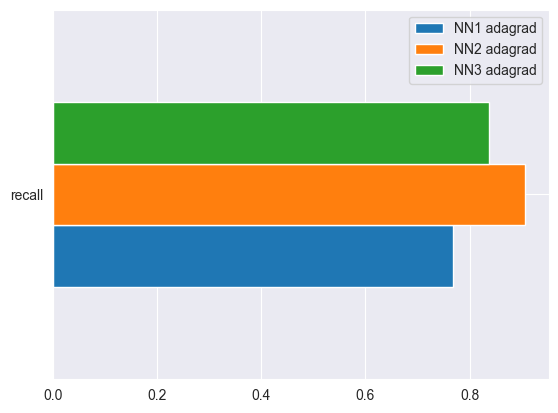

In [264]:
model_recall_adagrad_scores = {
    'NN1 adagrad': recall_adagrad,
    'NN2 adagrad': recall2_adagrad,
    'NN3 adagrad': recall3_adagrad
}
model_compare_recall_adagrad = pd.DataFrame(model_recall_adagrad_scores, index=["recall"])
model_compare_recall_adagrad.plot(kind='barh',)

## 3. ANNS Using "rmsprop" Optimiser

## ANN1 rmsprop

In [265]:
ann1_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])


In [266]:
ann1_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [267]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [268]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_rmsprop = ann1_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 589us/step - loss: 0.5823 - accuracy: 0.7429
Epoch 2/100
15/15 [==============================] - 0s 562us/step - loss: 0.3857 - accuracy: 0.8945
Epoch 3/100
15/15 [==============================] - 0s 524us/step - loss: 0.2802 - accuracy: 0.9231
Epoch 4/100
15/15 [==============================] - 0s 516us/step - loss: 0.2124 - accuracy: 0.9385
Epoch 5/100
15/15 [==============================] - 0s 491us/step - loss: 0.1661 - accuracy: 0.9560
Epoch 6/100
15/15 [==============================] - 0s 557us/step - loss: 0.1331 - accuracy: 0.9714
Epoch 7/100
15/15 [==============================] - 0s 479us/step - loss: 0.1091 - accuracy: 0.9802
Epoch 8/100
15/15 [==============================] - 0s 604us/step - loss: 0.0924 - accuracy: 0.9868
Epoch 9/100
15/15 [==============================] - 0s 472us/step - loss: 0.0796 - accuracy: 0.9868
Epoch 10/100
15/15 [==============================] - 0s 452us/step - loss: 0.0704 - accura

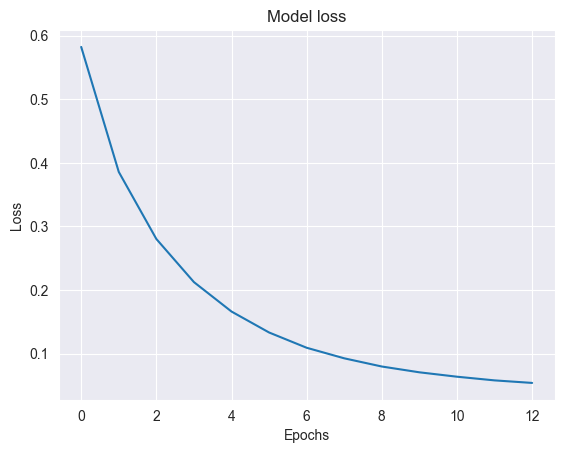

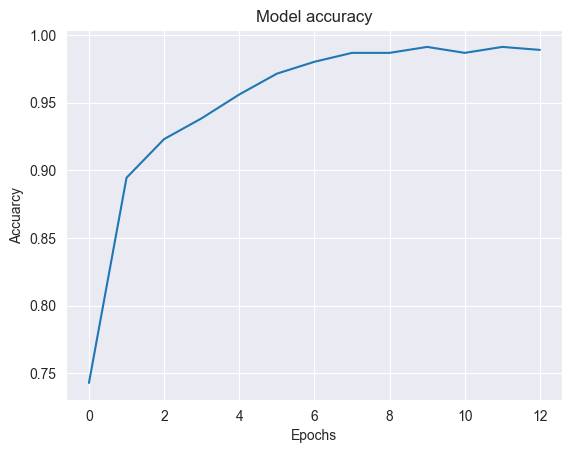

In [269]:
#EVALUATING

plt.plot(ann1_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [270]:
y_pred_rmsprop = get_pred_labels(ann1_rmsprop, X_test)

y_pred_rmsprop

4/4 [==============================] - 0s 702us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

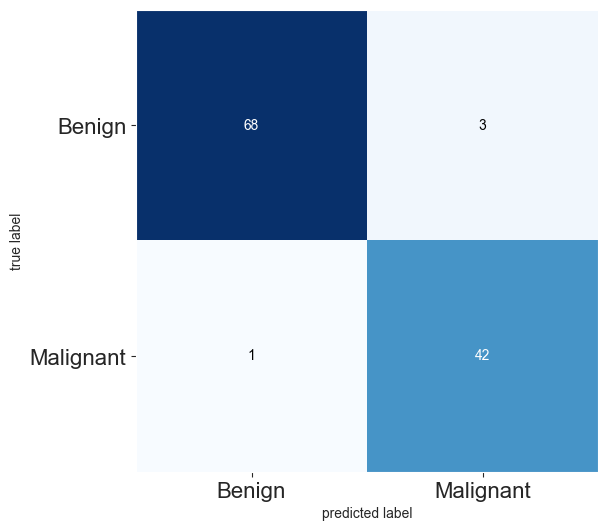

In [271]:
show_conf_matrix(y_pred_rmsprop)

In [272]:
acc1_rmsprop = accuracy_score(y_test.astype(int), y_pred_rmsprop.astype(int))
acc1_rmsprop

0.9649122807017544

In [273]:
recall_rmsprop = recall_score(y_test.astype(int), y_pred_rmsprop.astype(int))
recall_rmsprop

0.9767441860465116

In [274]:
print(classification_report(y_test.astype(int), y_pred_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## ANN2 rmsprop

In [275]:
ann2_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [276]:
ann2_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [277]:
ann2_hist_rmsprop = ann2_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 607us/step - loss: 0.5597 - accuracy: 0.6725
Epoch 2/100
15/15 [==============================] - 0s 557us/step - loss: 0.3850 - accuracy: 0.8945
Epoch 3/100
15/15 [==============================] - 0s 545us/step - loss: 0.2846 - accuracy: 0.9209
Epoch 4/100
15/15 [==============================] - 0s 470us/step - loss: 0.2310 - accuracy: 0.9121
Epoch 5/100
15/15 [==============================] - 0s 561us/step - loss: 0.1851 - accuracy: 0.9516
Epoch 6/100
15/15 [==============================] - 0s 533us/step - loss: 0.1724 - accuracy: 0.9429
Epoch 7/100
15/15 [==============================] - 0s 460us/step - loss: 0.1348 - accuracy: 0.9626
Epoch 8/100
15/15 [==============================] - 0s 444us/step - loss: 0.1178 - accuracy: 0.9626
Epoch 9/100
15/15 [==============================] - 0s 436us/step - loss: 0.1070 - accuracy: 0.9714
Epoch 10/100
15/15 [==============================] - 0s 491us/step - loss: 0.1011 - accura

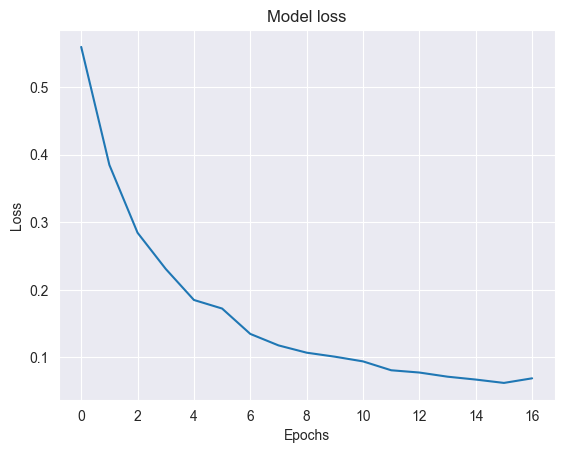

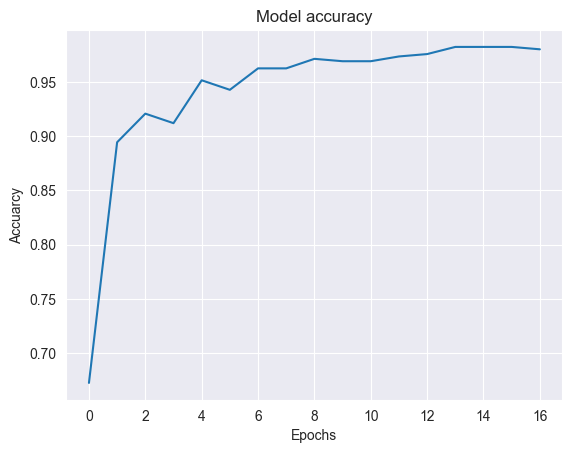

In [278]:
plt.plot(ann2_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [279]:
y_pred2_rmsprop = get_pred_labels(ann2_rmsprop, X_test)

4/4 [==============================] - 0s 961us/step


<Figure size 640x480 with 0 Axes>

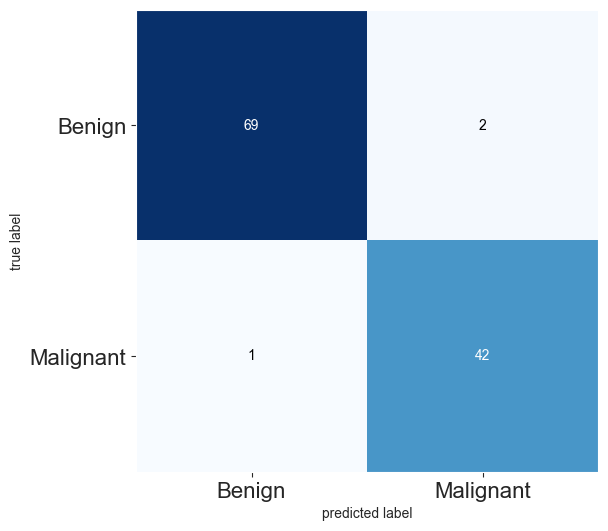

In [280]:
show_conf_matrix(y_pred2_rmsprop)

In [281]:
acc2_rmsprop = accuracy_score(y_test.astype(int), y_pred2_rmsprop.astype(int))
acc2_rmsprop

0.9736842105263158

In [282]:
recall2_rmsprop = recall_score(y_test.astype(int), y_pred2_rmsprop.astype(int))
recall2_rmsprop

0.9767441860465116

In [283]:
print(classification_report(y_test.astype(int), y_pred2_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ANN3 rmsprop

In [284]:
ann3_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [285]:
ann3_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
			
			
ann3_hist_rmsprop = ann3_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 638us/step - loss: 0.4520 - accuracy: 0.8857
Epoch 2/100
15/15 [==============================] - 0s 637us/step - loss: 0.2119 - accuracy: 0.9604
Epoch 3/100
15/15 [==============================] - 0s 600us/step - loss: 0.1280 - accuracy: 0.9714
Epoch 4/100
15/15 [==============================] - 0s 622us/step - loss: 0.0925 - accuracy: 0.9736
Epoch 5/100
15/15 [==============================] - 0s 583us/step - loss: 0.0758 - accuracy: 0.9780
Epoch 6/100
15/15 [==============================] - 0s 604us/step - loss: 0.0637 - accuracy: 0.9824
Epoch 7/100
15/15 [==============================] - 0s 512us/step - loss: 0.0578 - accuracy: 0.9846
Epoch 8/100
15/15 [==============================] - 0s 502us/step - loss: 0.0520 - accuracy: 0.9868
Epoch 9/100
15/15 [==============================] - 0s 498us/step - loss: 0.0476 - accuracy: 0.9890
Epoch 10/100
15/15 [==============================] - 0s 546us/step - loss: 0.0427 - accura

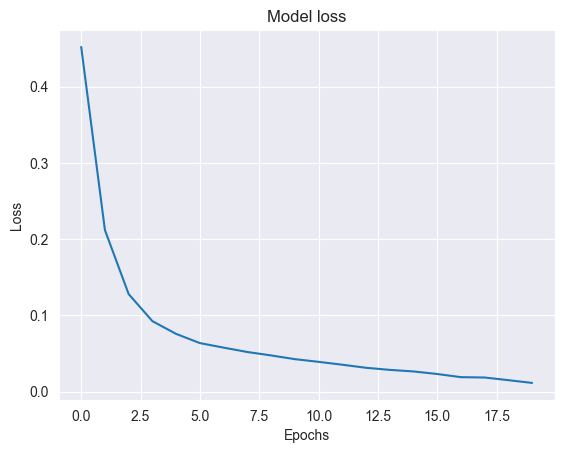

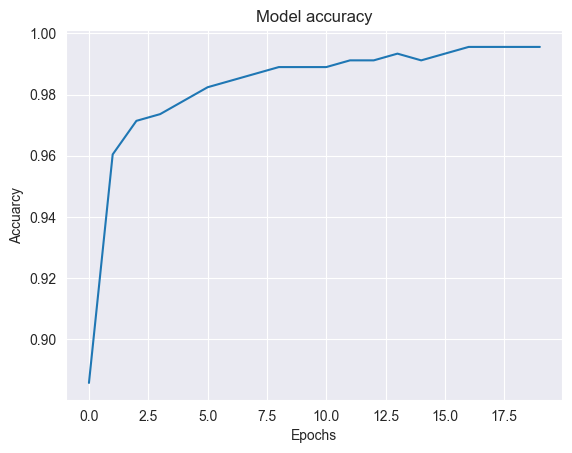

In [286]:
plt.plot(ann3_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [287]:
y_pred3_rmsprop = get_pred_labels(ann3_rmsprop, X_test)

4/4 [==============================] - 0s 848us/step


<Figure size 640x480 with 0 Axes>

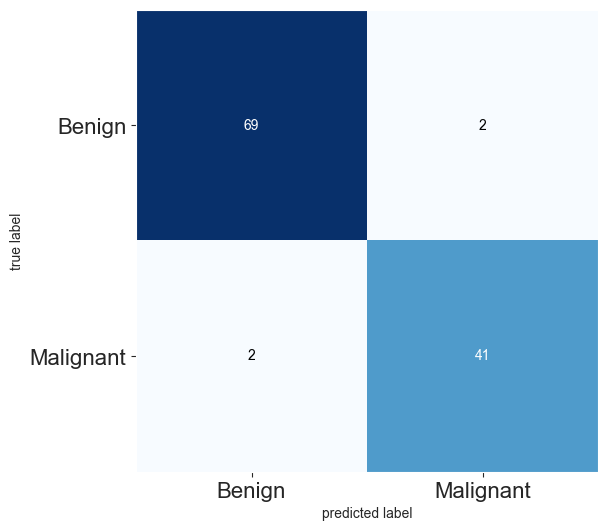

In [288]:
show_conf_matrix(y_pred3_rmsprop)

In [289]:
acc3_rmsprop = accuracy_score(y_test.astype(int), y_pred3_rmsprop.astype(int))
acc3_rmsprop

0.9649122807017544

In [290]:
recall3_rmsprop = recall_score(y_test.astype(int), y_pred3_rmsprop.astype(int))
recall3_rmsprop

0.9534883720930233

In [291]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

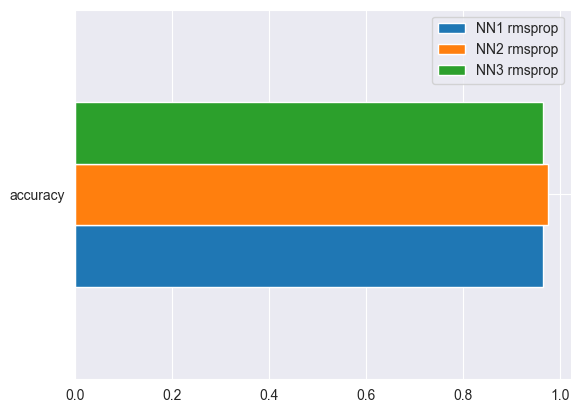

In [292]:
model_scores_rmsprop = {
    'NN1 rmsprop': acc1_rmsprop,
    'NN2 rmsprop': acc2_rmsprop,
    'NN3 rmsprop': acc3_rmsprop
}
model_compare_rmsprop = pd.DataFrame(model_scores_rmsprop, index=["accuracy"])
model_compare_rmsprop.plot(kind='barh',)

<Axes: >

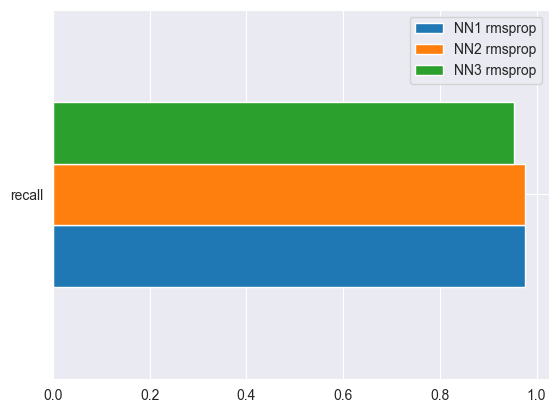

In [293]:
model_recall_rmsprop_scores = {
    'NN1 rmsprop': recall_rmsprop,
    'NN2 rmsprop': recall2_rmsprop,
    'NN3 rmsprop': recall3_rmsprop
}
model_compare_recall_rmsprop = pd.DataFrame(model_recall_rmsprop_scores, index=["recall"])
model_compare_recall_rmsprop.plot(kind='barh',)

## Sopstvena loss funkcija 1

https://www.analyticsvidhya.com/blog/2022/09/dummies-guide-to-writing-a-custom-loss-function-in-tensorflow/

In [294]:
class Custom_CE_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):        
        log_y_pred = tf.math.log(y_pred)
        elements = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
        return tf.reduce_mean(tf.reduce_sum(elements,axis=1))
    
def SelfLossFunction2(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    custom_loss=kb.square(y_true-y_pred)
    return custom_loss

## ANN3 using rmsprop and custom loss

In [295]:
ann3_rmsprop_customloss = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [296]:
ann3_rmsprop_customloss.compile(optimizer='rmsprop',
            loss=SelfLossFunction2,
            metrics=['accuracy'])

In [297]:
ann3_hist_rmsprop_customloss = ann3_rmsprop_customloss.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 846us/step - loss: 0.1314 - accuracy: 0.8923
Epoch 2/100
15/15 [==============================] - 0s 628us/step - loss: 0.0573 - accuracy: 0.9626
Epoch 3/100
15/15 [==============================] - 0s 618us/step - loss: 0.0366 - accuracy: 0.9670
Epoch 4/100
15/15 [==============================] - 0s 704us/step - loss: 0.0268 - accuracy: 0.9714
Epoch 5/100
15/15 [==============================] - 0s 602us/step - loss: 0.0215 - accuracy: 0.9802
Epoch 6/100
15/15 [==============================] - 0s 570us/step - loss: 0.0173 - accuracy: 0.9802
Epoch 7/100
15/15 [==============================] - 0s 597us/step - loss: 0.0142 - accuracy: 0.9824
Epoch 8/100
15/15 [==============================] - 0s 667us/step - loss: 0.0125 - accuracy: 0.9868
Epoch 9/100
15/15 [==============================] - 0s 625us/step - loss: 0.0106 - accuracy: 0.9890
Epoch 10/100
15/15 [==============================] - 0s 500us/step - loss: 0.0092 - accura

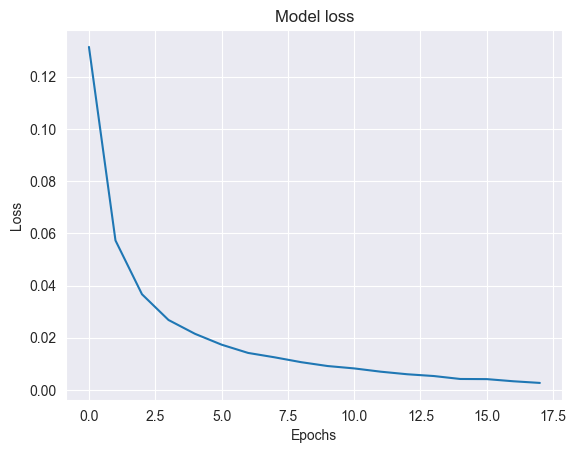

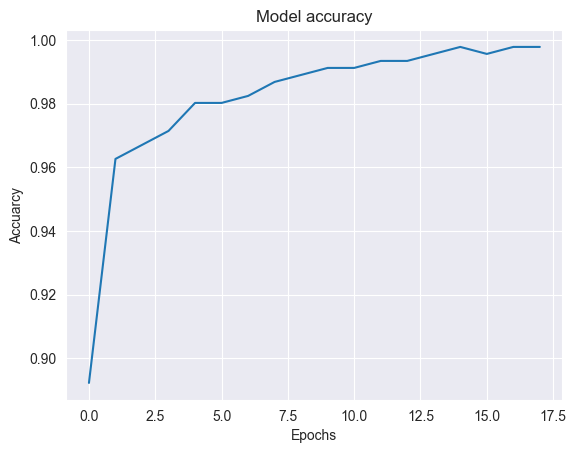

In [298]:
plt.plot(ann3_hist_rmsprop_customloss.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop_customloss.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [299]:
y_pred3_rmsprop_customloss = get_pred_labels(ann3_rmsprop_customloss, X_test)

4/4 [==============================] - 0s 815us/step


<Figure size 640x480 with 0 Axes>

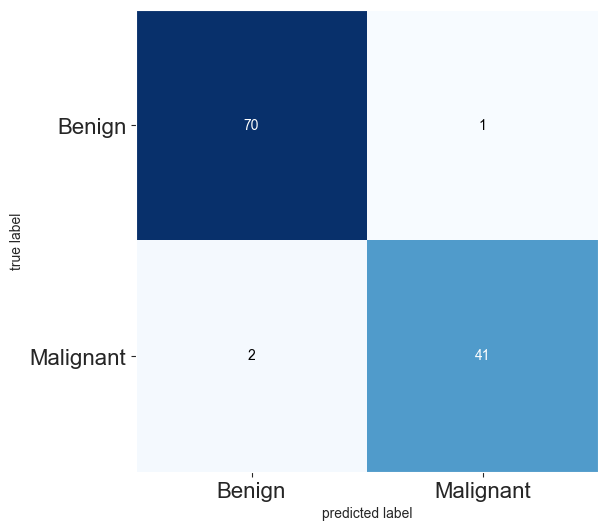

In [300]:
show_conf_matrix(y_pred3_rmsprop_customloss)

In [301]:
acc3_rmsprop_customloss = accuracy_score(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int))
acc3_rmsprop_customloss

0.9736842105263158

In [302]:
recall_custom_loss = recall_score(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int))
recall_custom_loss

0.9534883720930233

In [303]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Axes: >

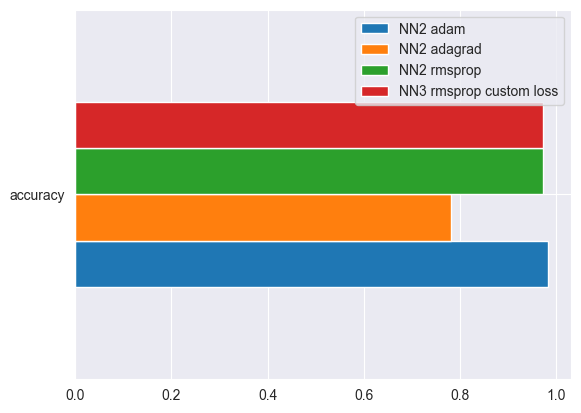

In [352]:
model_scores_anns3 = {
    'NN2 adam': acc2,
    'NN2 adagrad': acc2_adagrad,
    'NN2 rmsprop': acc2_rmsprop,
    'NN3 rmsprop custom loss': acc3_rmsprop_customloss
}
model_compare_rmsprop_anns3 = pd.DataFrame(model_scores_anns3, index=["accuracy"])
model_compare_rmsprop_anns3.plot(kind='barh',)

<Axes: >

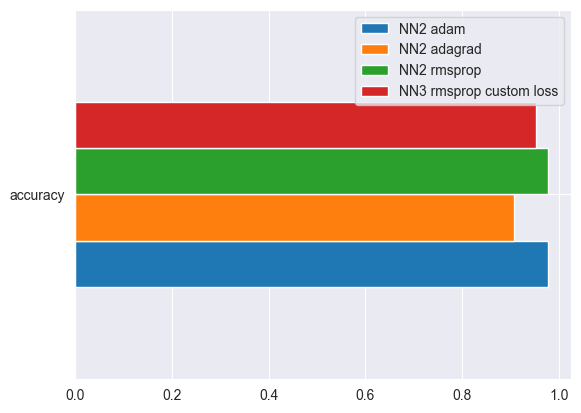

In [353]:
model_recall_scores_anns = {
    'NN2 adam': recall2,
    'NN2 adagrad': recall2_adagrad,
    'NN2 rmsprop': recall2_rmsprop,
    'NN3 rmsprop custom loss': recall_custom_loss
}
model_compare_recalls_anns = pd.DataFrame(model_recall_scores_anns, index=["accuracy"])
model_compare_recalls_anns.plot(kind='barh',)

## Overfitting ANN1

In [306]:
ann_overfitted = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [307]:
ann_overfitted.compile(optimizer='adam',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [308]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted = np.asarray(X_train).astype('float32')
y_train_overfitted = np.asarray(y_train).astype('float32')

In [309]:
BATCH_SIZE = 32
EPOCHS = 100
ann_hist_overfitted = ann_overfitted.fit(X_train_overfitted, y_train_overfitted, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
15/15 [==============================] - 0s 805us/step - loss: 0.3866 - accuracy: 0.8571
Epoch 2/100
15/15 [==============================] - 0s 782us/step - loss: 0.2111 - accuracy: 0.9253
Epoch 3/100
15/15 [==============================] - 0s 651us/step - loss: 0.1105 - accuracy: 0.9407
Epoch 4/100
15/15 [==============================] - 0s 636us/step - loss: 0.0692 - accuracy: 0.9473
Epoch 5/100
15/15 [==============================] - 0s 579us/step - loss: 0.0477 - accuracy: 0.9648
Epoch 6/100
15/15 [==============================] - 0s 626us/step - loss: 0.0353 - accuracy: 0.9802
Epoch 7/100
15/15 [==============================] - 0s 509us/step - loss: 0.0286 - accuracy: 0.9824
Epoch 8/100
15/15 [==============================] - 0s 492us/step - loss: 0.0242 - accuracy: 0.9824
Epoch 9/100
15/15 [==============================] - 0s 522us/step - loss: 0.0214 - accuracy: 0.9846
Epoch 10/100
15/15 [==============================] - 0s 514us/step - loss: 0.0198 - accura

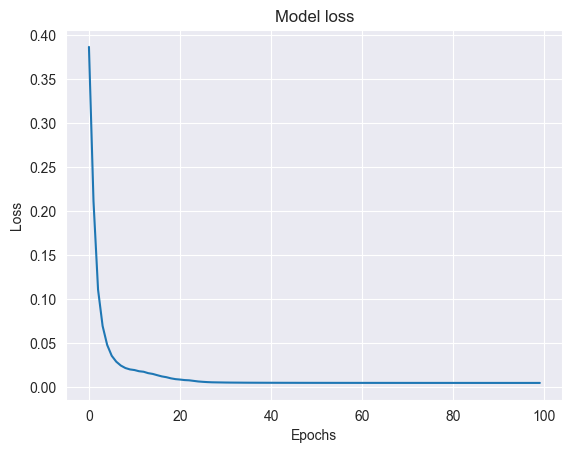

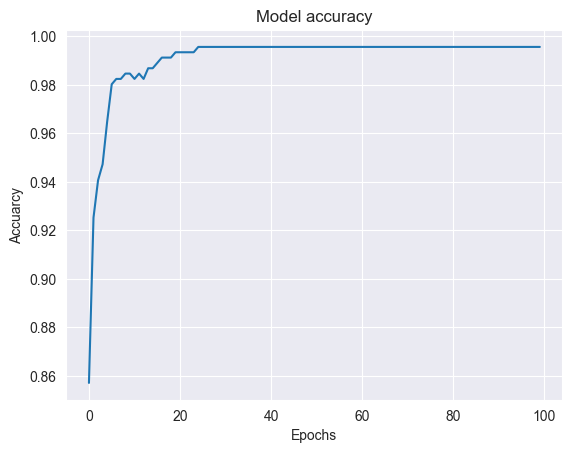

In [310]:
plt.plot(ann_hist_overfitted.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [311]:
y_pred_overfitted = get_pred_labels(ann_overfitted, X_test)
y_pred_overfitted

4/4 [==============================] - 0s 831us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

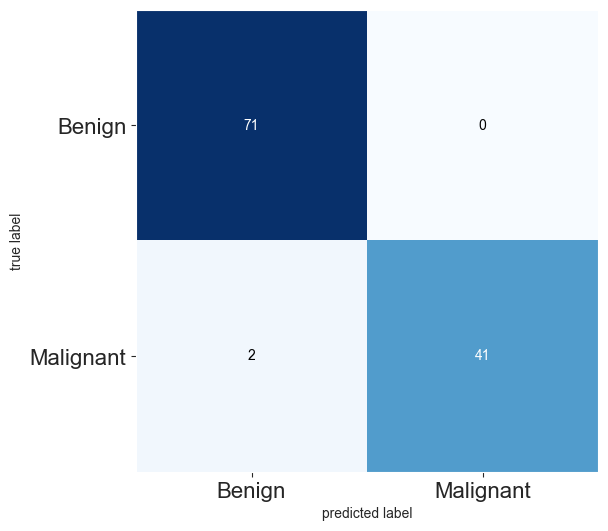

In [312]:
show_conf_matrix(y_pred_overfitted)

In [313]:
acc_overfitted = accuracy_score(y_test.astype(int), y_pred_overfitted.astype(int))
acc_overfitted

0.9824561403508771

In [314]:
print(classification_report(y_test.astype(int), y_pred_overfitted.astype(int)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## ANN Overfitted using rmsprop optimiser loss + added one more layer + added 50 epochs

In [315]:
ann_overfitted_MAPE = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=10, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [316]:
ann_overfitted_MAPE.compile(optimizer='rmsprop',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [317]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted_MAPE = np.asarray(X_train).astype('float32')
y_train_overfitted_MAPE = np.asarray(y_train).astype('float32')

In [318]:
BATCH_SIZE = 32
EPOCHS = 150
ann_hist_overfitted_MAPE = ann_overfitted_MAPE.fit(X_train_overfitted_MAPE, y_train_overfitted_MAPE, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/150
15/15 [==============================] - 0s 616us/step - loss: 0.4319 - accuracy: 0.8330
Epoch 2/150
15/15 [==============================] - 0s 566us/step - loss: 0.2688 - accuracy: 0.9253
Epoch 3/150
15/15 [==============================] - 0s 492us/step - loss: 0.1291 - accuracy: 0.9604
Epoch 4/150
15/15 [==============================] - 0s 528us/step - loss: 0.0707 - accuracy: 0.9714
Epoch 5/150
15/15 [==============================] - 0s 484us/step - loss: 0.0468 - accuracy: 0.9824
Epoch 6/150
15/15 [==============================] - 0s 527us/step - loss: 0.0353 - accuracy: 0.9802
Epoch 7/150
15/15 [==============================] - 0s 480us/step - loss: 0.0262 - accuracy: 0.9868
Epoch 8/150
15/15 [==============================] - 0s 491us/step - loss: 0.0220 - accuracy: 0.9846
Epoch 9/150
15/15 [==============================] - 0s 482us/step - loss: 0.0206 - accuracy: 0.9846
Epoch 10/150
15/15 [==============================] - 0s 505us/step - loss: 0.0174 - accura

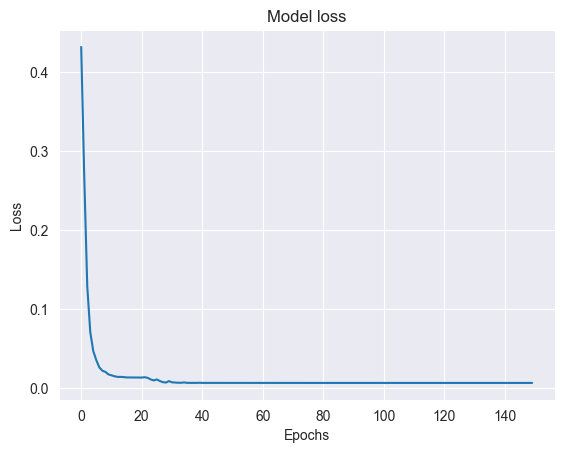

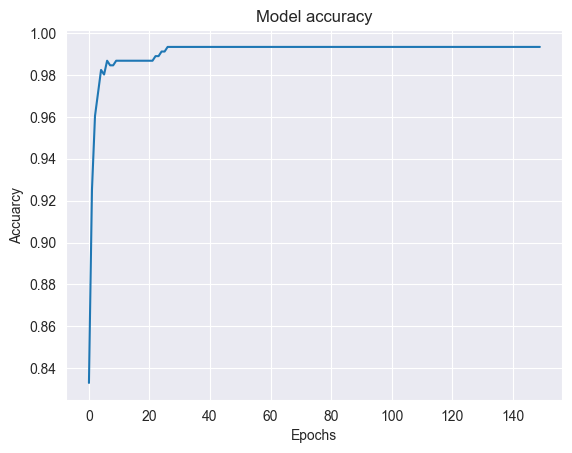

In [319]:
plt.plot(ann_hist_overfitted_MAPE.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted_MAPE.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [320]:
y_pred_overfitted_MAPE = get_pred_labels(ann_overfitted_MAPE, X_test)
y_pred_overfitted_MAPE

4/4 [==============================] - 0s 671us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

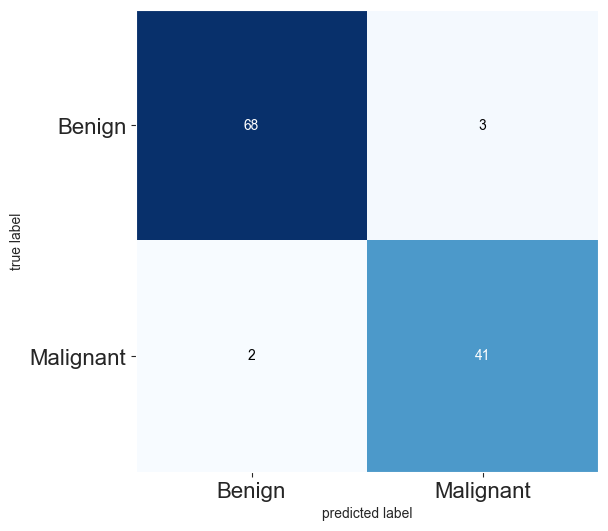

In [321]:
show_conf_matrix(y_pred_overfitted_MAPE)

In [322]:
acc_overfitted_MAPE = accuracy_score(y_test.astype(int), y_pred_overfitted_MAPE.astype(int))
acc_overfitted_MAPE

0.956140350877193

In [323]:
print(classification_report(y_test.astype(int), y_pred_overfitted_MAPE.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Upsampling i undersampling koriscenjem algoritama [2]

[2] https://towardsdatascience.com/smote-fdce2f605729

### Oversampling using SMOTE

<Axes: title={'center': 'Class distribution after applying SMOTE'}, xlabel='buy'>

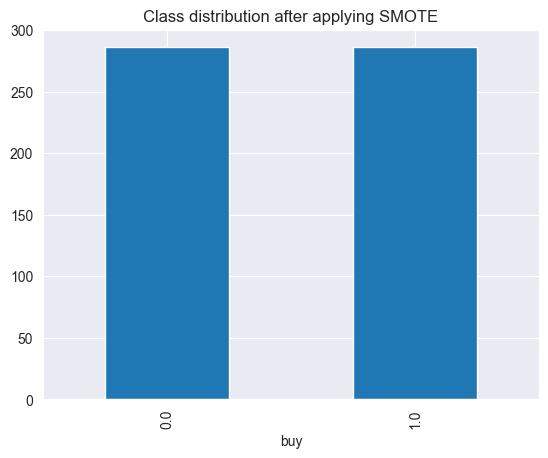

In [324]:
X_oversampled, y_oversampled = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_oversampled).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='buy')

In [325]:
ann_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann_oversampled.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

In [326]:
BATCH_SIZE = 32
EPOCHS = 100
ann_oversampled_hist = ann_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
18/18 [==============================] - 0s 589us/step - loss: 0.6186 - accuracy: 0.7255
Epoch 2/100
18/18 [==============================] - 0s 561us/step - loss: 0.4130 - accuracy: 0.9108
Epoch 3/100
18/18 [==============================] - 0s 552us/step - loss: 0.2894 - accuracy: 0.9248
Epoch 4/100
18/18 [==============================] - 0s 587us/step - loss: 0.2112 - accuracy: 0.9423
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9545
Epoch 6/100
18/18 [==============================] - 0s 453us/step - loss: 0.1278 - accuracy: 0.9580
Epoch 7/100
18/18 [==============================] - 0s 517us/step - loss: 0.1042 - accuracy: 0.9668
Epoch 8/100
18/18 [==============================] - 0s 433us/step - loss: 0.0875 - accuracy: 0.9773
Epoch 9/100
18/18 [==============================] - 0s 438us/step - loss: 0.0759 - accuracy: 0.9825
Epoch 10/100
18/18 [==============================] - 0s 448us/step - loss: 0.0675 - accuracy

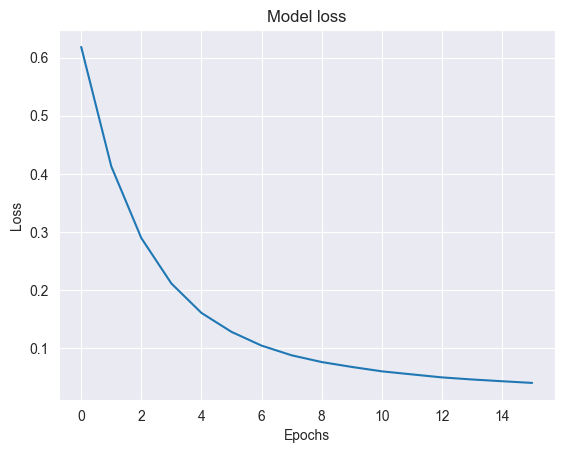

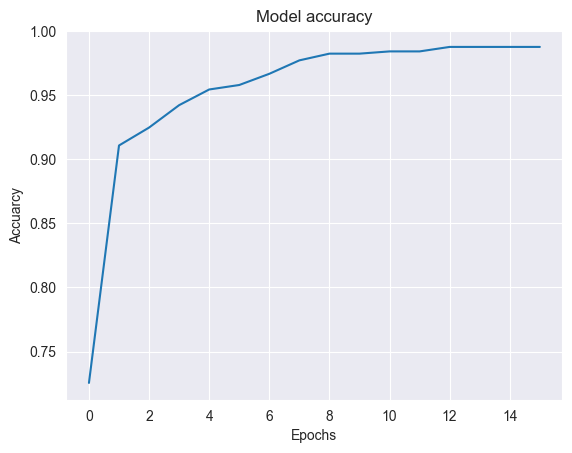

In [327]:
plt.plot(ann_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(ann_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [328]:
y_pred_oversampled = get_pred_labels(ann_oversampled, X_test)
y_pred_oversampled

4/4 [==============================] - 0s 816us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

<Figure size 640x480 with 0 Axes>

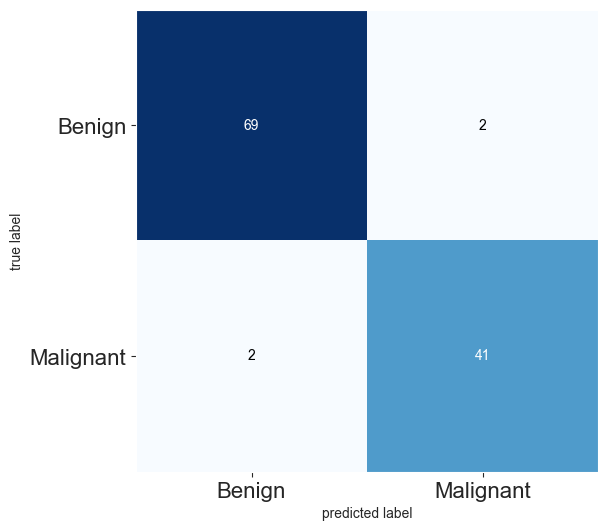

In [329]:
show_conf_matrix(y_pred_oversampled)

In [330]:
accuracy_score_oversampled = accuracy_score(y_test.astype(int), y_pred_oversampled.astype(int))
accuracy_score_oversampled

0.9649122807017544

In [331]:
recall_oversampled = recall_score(y_test.astype(int), y_pred_oversampled.astype(int))
recall_oversampled

0.9534883720930233

In [332]:
print(classification_report(y_test.astype(int), y_pred_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### ANN2 Oversampled RMSPROP optimization

In [333]:
ann2_rmsprop_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann2_rmsprop_oversampled.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
ann2_rmsprop_oversampled_hist = ann2_rmsprop_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 0s 590us/step - loss: 0.5459 - accuracy: 0.7255
Epoch 2/100
18/18 [==============================] - 0s 658us/step - loss: 0.3381 - accuracy: 0.9196
Epoch 3/100
18/18 [==============================] - 0s 567us/step - loss: 0.2418 - accuracy: 0.9476
Epoch 4/100
18/18 [==============================] - 0s 531us/step - loss: 0.1878 - accuracy: 0.9528
Epoch 5/100
18/18 [==============================] - 0s 540us/step - loss: 0.1440 - accuracy: 0.9598
Epoch 6/100
18/18 [==============================] - 0s 449us/step - loss: 0.1224 - accuracy: 0.9650
Epoch 7/100
18/18 [==============================] - 0s 461us/step - loss: 0.1019 - accuracy: 0.9598
Epoch 8/100
18/18 [==============================] - 0s 454us/step - loss: 0.0904 - accuracy: 0.9738
Epoch 9/100
18/18 [==============================] - 0s 441us/step - loss: 0.0757 - accuracy: 0.9825
Epoch 10/100
18/18 [==============================] - 0s 439us/step - loss: 0.0610 - accura

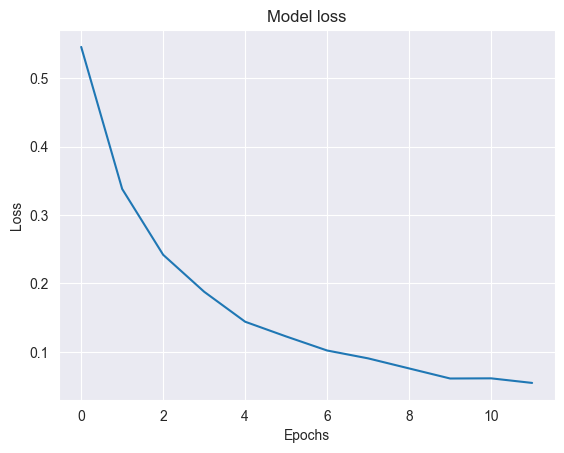

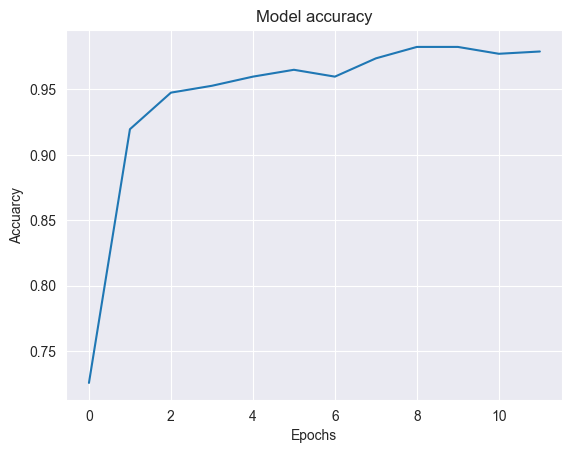

In [334]:
plt.plot(ann2_rmsprop_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_rmsprop_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

4/4 [==============================] - 0s 943us/step


<Figure size 640x480 with 0 Axes>

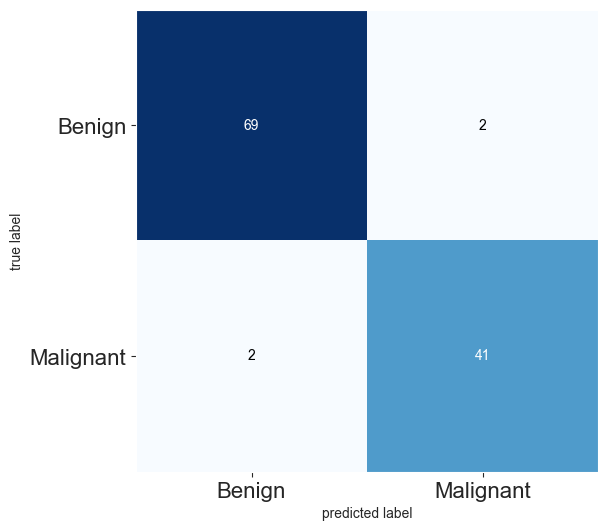

In [335]:
y_pred2_rmsprop_oversampled = get_pred_labels(ann2_rmsprop_oversampled, X_test)
show_conf_matrix(y_pred2_rmsprop_oversampled)

In [336]:
acc2_rmsprop_oversampled = accuracy_score(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int))
acc2_rmsprop_oversampled

0.9649122807017544

In [337]:
recall2_rmsprop_oversampled = recall_score(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int))
recall2_rmsprop_oversampled

0.9534883720930233

In [338]:
print(classification_report(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### ANN3 Oversampled adam optimizer

In [339]:
ann3_adam_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann3_adam_oversampled.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
ann3_adam_oversampled_hist = ann3_adam_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 1s 672us/step - loss: 0.5640 - accuracy: 0.8724
Epoch 2/100
18/18 [==============================] - 0s 678us/step - loss: 0.3124 - accuracy: 0.9318
Epoch 3/100
18/18 [==============================] - 0s 576us/step - loss: 0.1409 - accuracy: 0.9650
Epoch 4/100
18/18 [==============================] - 0s 620us/step - loss: 0.0799 - accuracy: 0.9755
Epoch 5/100
18/18 [==============================] - 0s 590us/step - loss: 0.0616 - accuracy: 0.9825
Epoch 6/100
18/18 [==============================] - 0s 488us/step - loss: 0.0513 - accuracy: 0.9860
Epoch 7/100
18/18 [==============================] - 0s 625us/step - loss: 0.0430 - accuracy: 0.9860
Epoch 8/100
18/18 [==============================] - 0s 511us/step - loss: 0.0355 - accuracy: 0.9895
Epoch 9/100
18/18 [==============================] - 0s 619us/step - loss: 0.0327 - accuracy: 0.9860
Epoch 10/100
18/18 [==============================] - 0s 570us/step - loss: 0.0284 - accura

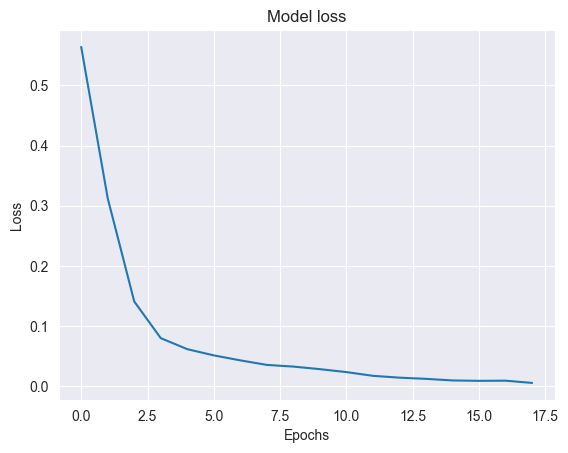

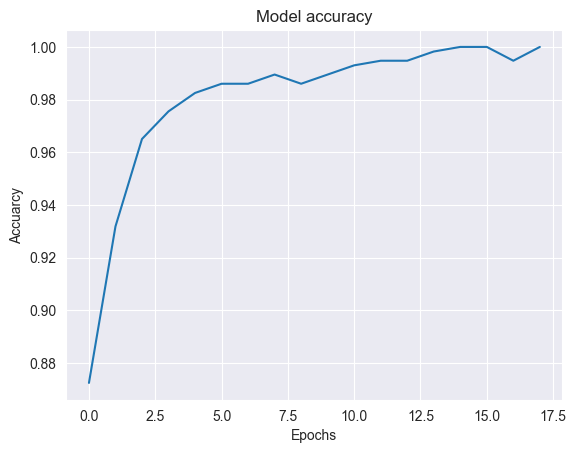

In [340]:
plt.plot(ann3_adam_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_adam_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

4/4 [==============================] - 0s 627us/step


<Figure size 640x480 with 0 Axes>

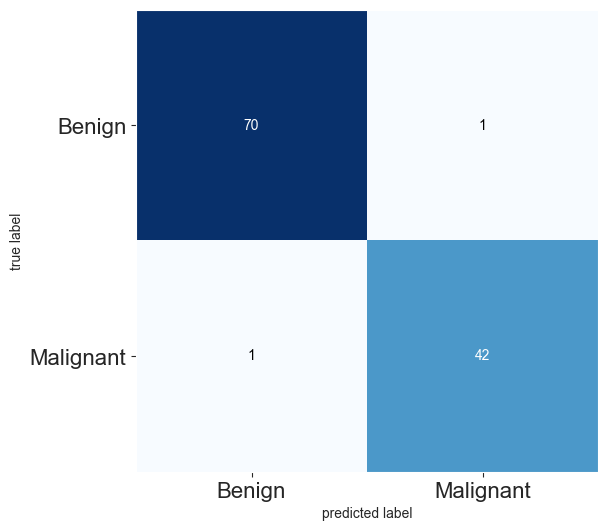

In [341]:
y_pred3_adam_oversampled = get_pred_labels(ann3_adam_oversampled, X_test)
show_conf_matrix(y_pred3_adam_oversampled)

In [342]:
acc3_adam_oversampled = accuracy_score(y_test.astype(int), y_pred3_adam_oversampled.astype(int))
acc3_adam_oversampled

0.9824561403508771

In [343]:
recall3_adam_oversampled = recall_score(y_test.astype(int), y_pred3_adam_oversampled.astype(int))
recall3_adam_oversampled

0.9767441860465116

In [344]:
print(classification_report(y_test.astype(int), y_pred3_adam_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

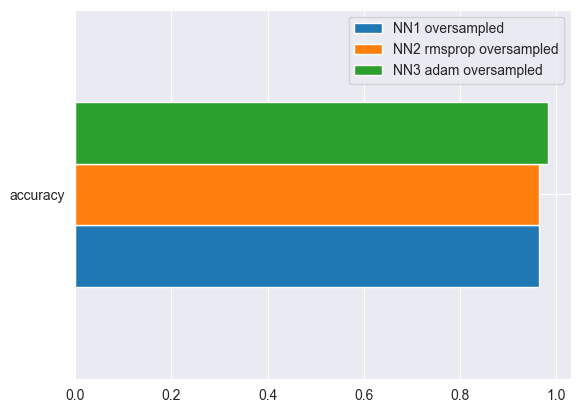

In [345]:
model_accuracy_scores_oversampled = {
    'NN1 oversampled': accuracy_score_oversampled,
    'NN2 rmsprop oversampled': acc2_rmsprop_oversampled,
    'NN3 adam oversampled': acc3_adam_oversampled
}
model_compare_accuracy_oversampled = pd.DataFrame(model_accuracy_scores_oversampled, index=["accuracy"])
model_compare_accuracy_oversampled.plot(kind='barh',)

<Axes: >

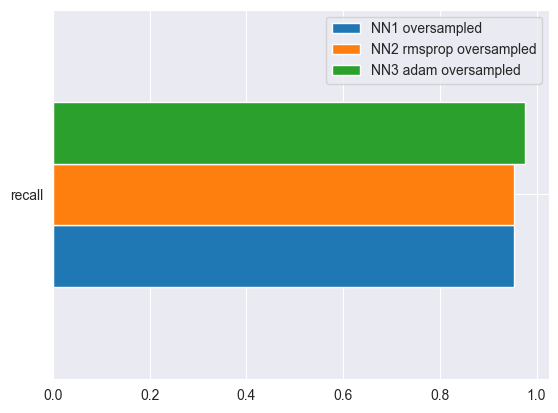

In [346]:
model_recall_scores_oversampled = {
    'NN1 oversampled': recall_oversampled,
    'NN2 rmsprop oversampled': recall2_rmsprop_oversampled,
    'NN3 adam oversampled': recall3_adam_oversampled
}
model_compare_recall_oversampled = pd.DataFrame(model_recall_scores_oversampled, index=["recall"])
model_compare_recall_oversampled.plot(kind='barh',)

### Comparing all the models

<Axes: >

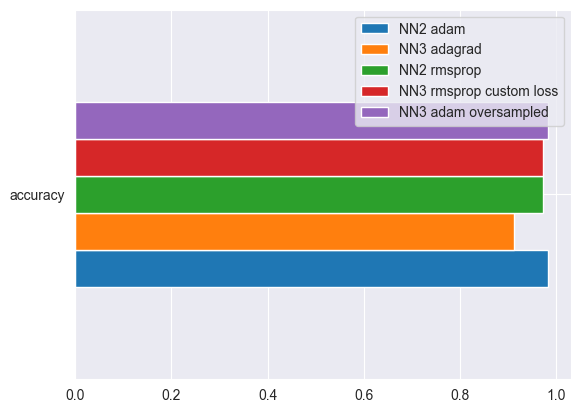

In [359]:
model_scores_all_anns = {
    'NN2 adam': acc2,
    'NN3 adagrad': acc3_adagrad,
    'NN2 rmsprop': acc2_rmsprop,
    'NN3 rmsprop custom loss': acc3_rmsprop_customloss,
    'NN3 adam oversampled': acc3_adam_oversampled
}
model_compare_scores_all_anns = pd.DataFrame(model_scores_all_anns, index=["accuracy"])
model_compare_scores_all_anns.plot(kind='barh',)

<Axes: >

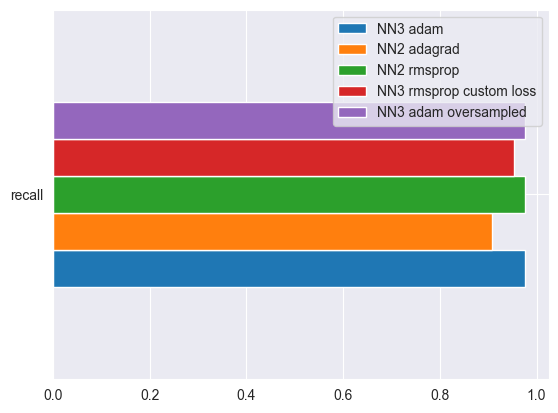

In [360]:
model_recall_scores_all_anns = {
    'NN3 adam': recall1,
    'NN2 adagrad': recall2_adagrad,
    'NN2 rmsprop': recall2_rmsprop,
    'NN3 rmsprop custom loss': recall_custom_loss,
    'NN3 adam oversampled': recall3_adam_oversampled
}
model_compare_recalls_all_anns = pd.DataFrame(model_recall_scores_all_anns, index=["recall"])
model_compare_recalls_all_anns.plot(kind='barh',)